In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation, Dropout, GlobalMaxPool1D, Conv1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import text, sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import utils

C:\Users\gprak\anaconda3\envs\my36v2\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\gprak\anaconda3\envs\my36v2\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\gprak\anaconda3\envs\my36v2\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\gprak\anaconda3\envs\my36v2\lib\site-packages\tensorflow\pyth

In [2]:
df = pd.read_csv('../Zycus/86b13d9a4b8e11ec/project/training_data.csv')
df.head()

,title,category
0,The Three Amigos,None
1,Home Essentials Blue Floral Glass Vintage Styl...,Home & Kitchen
2,Cooper Wiring Quiet Toggle Switch Single Pole ...,Tools & Home Improvement
3,Baseboarders&reg; Wall Brackets,Tools & Home Improvement
4,The Great Wave Off Kanagawa Custom Rectangle M...,Office Products


In [3]:
df.shape

(20188, 2)

In [4]:
df.columns

Index(['title', 'category'], dtype='object')

In [5]:
sentences = df['title']
y = df['category']

sentences_train, sentences_test, train_y, test_y = train_test_split(sentences, y, test_size=0.25, random_state=42)

In [6]:
tokenize = Tokenizer(num_words=1000)
tokenize.fit_on_texts(sentences_train)

X_train = tokenize.texts_to_sequences(sentences_train)
X_test = tokenize.texts_to_sequences(sentences_test)

vocab_size = len(tokenize.word_index) + 1  

print(sentences_train[2])
print(X_train[2])

Cooper Wiring Quiet Toggle Switch Single Pole Lighted 15 A 120 V Ivory Ul Boxed
[136, 276, 87, 51, 224, 21, 224, 10, 220]


In [7]:
maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

print(X_train[0, :])

[409 160 104  77 136  76  47  51  68  69   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]


In [8]:
encoder = LabelEncoder()
encoder.fit(train_y)
y_train = encoder.transform(train_y)
y_test = encoder.transform(test_y)

num_classes = np.max(y_train) + 1
print(num_classes)
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

7


In [13]:
embedding_dim = 16

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(7, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 16)           450048    
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)                25616     
_________________________________________________________________
dense_4 (Dense)              (None, 7)                 119       
Total params: 475,783
Trainable params: 475,783
Non-trainable params: 0
_________________________________________________________________


In [14]:
#from keras.utils import plot_model
#plot_model(model, to_file='model_1.png', show_shapes=True, show_layer_names=True)

In [15]:
#!pip install pydot

In [16]:
history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=15,
                    validation_data=(X_test, y_test))


Train on 15141 samples, validate on 5047 samples
Epoch 1/15
15141/15141 [==============================] - 6s 389us/step - loss: 1.3893 - accuracy: 0.4992 - val_loss: 1.2978 - val_accuracy: 0.5047
Epoch 2/15
15141/15141 [==============================] - 6s 364us/step - loss: 1.2094 - accuracy: 0.5099 - val_loss: 1.1886 - val_accuracy: 0.4944
Epoch 3/15
15141/15141 [==============================] - 6s 368us/step - loss: 1.1189 - accuracy: 0.5263 - val_loss: 1.1635 - val_accuracy: 0.4860
Epoch 4/15
15141/15141 [==============================] - 6s 366us/step - loss: 1.0590 - accuracy: 0.5430 - val_loss: 1.1405 - val_accuracy: 0.4882
Epoch 5/15
15141/15141 [==============================] - 6s 364us/step - loss: 1.0013 - accuracy: 0.5617 - val_loss: 1.1394 - val_accuracy: 0.4835
Epoch 6/15
15141/15141 [==============================] - 6s 365us/step - loss: 0.9524 - accuracy: 0.5840 - val_loss: 1.1385 - val_accuracy: 0.4864
Epoch 7/15
15141/15141 [==============================] - 6s 3

In [17]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.7865
Testing Accuracy:  0.4500


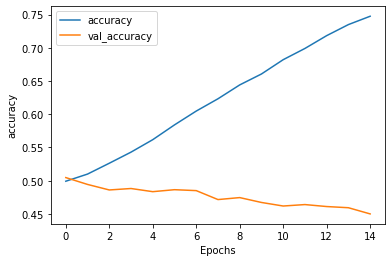

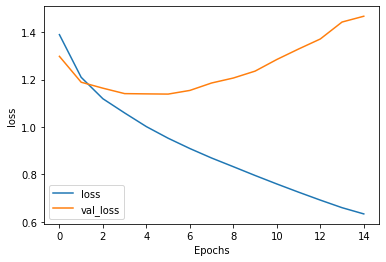

In [18]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [21]:
model2 = Sequential()
model2.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen))
model2.add(Flatten())
model2.add(Dense(16, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(7, activation='softmax'))

model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 16)           450048    
_________________________________________________________________
flatten_4 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 16)                25616     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 7)                 119       
Total params: 475,783
Trainable params: 475,783
Non-trainable params: 0
_________________________________________________________________


In [22]:
history_two = model2.fit(X_train, y_train,
                        batch_size=32,
                        epochs=15,
                        validation_data=(X_test, y_test))

Train on 15141 samples, validate on 5047 samples
Epoch 1/15
15141/15141 [==============================] - 6s 389us/step - loss: 1.5241 - accuracy: 0.4811 - val_loss: 1.3500 - val_accuracy: 0.5041
Epoch 2/15
15141/15141 [==============================] - 5s 357us/step - loss: 1.3391 - accuracy: 0.5010 - val_loss: 1.2435 - val_accuracy: 0.5031
Epoch 3/15
15141/15141 [==============================] - 5s 351us/step - loss: 1.2568 - accuracy: 0.5010 - val_loss: 1.1922 - val_accuracy: 0.5033
Epoch 4/15
15141/15141 [==============================] - 5s 346us/step - loss: 1.1797 - accuracy: 0.5018 - val_loss: 1.1447 - val_accuracy: 0.4961
Epoch 5/15
15141/15141 [==============================] - 5s 350us/step - loss: 1.1175 - accuracy: 0.5074 - val_loss: 1.1084 - val_accuracy: 0.4967
Epoch 6/15
15141/15141 [==============================] - 5s 349us/step - loss: 1.0682 - accuracy: 0.5156 - val_loss: 1.0996 - val_accuracy: 0.5023
Epoch 7/15
15141/15141 [==============================] - 5s 35

In [23]:
loss, accuracy = model2.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model2.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.7039
Testing Accuracy:  0.4741


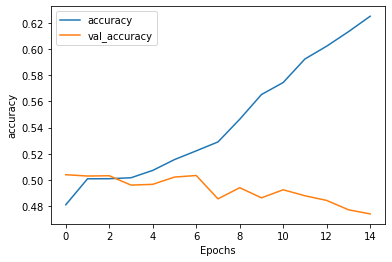

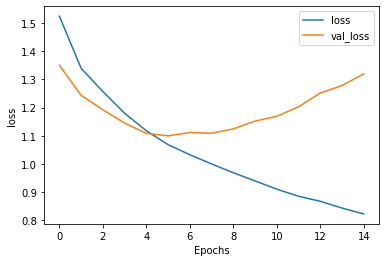

In [24]:
plot_graphs(history_two, "accuracy")
plot_graphs(history_two, "loss")

In [25]:
embedding_dim = 50

model3 = Sequential()
model3.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen))
model3.add(GlobalMaxPool1D())
model3.add(Dense(16, activation='relu'))
model3.add(Dense(7, activation='softmax'))

model3.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

model3.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 100, 50)           1406400   
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 50)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 16)                816       
_________________________________________________________________
dense_10 (Dense)             (None, 7)                 119       
Total params: 1,407,335
Trainable params: 1,407,335
Non-trainable params: 0
_________________________________________________________________


In [26]:
history_3 = model3.fit(X_train, y_train,
                       batch_size=32,
                       epochs=15,
                       validation_data=(X_test, y_test))

Train on 15141 samples, validate on 5047 samples
Epoch 1/15
15141/15141 [==============================] - 12s 774us/step - loss: 1.4293 - accuracy: 0.4964 - val_loss: 1.2717 - val_accuracy: 0.5001
Epoch 2/15
15141/15141 [==============================] - 11s 758us/step - loss: 1.2095 - accuracy: 0.5077 - val_loss: 1.1732 - val_accuracy: 0.4961
Epoch 3/15
15141/15141 [==============================] - 11s 747us/step - loss: 1.1036 - accuracy: 0.5279 - val_loss: 1.1341 - val_accuracy: 0.4942
Epoch 4/15
15141/15141 [==============================] - 11s 737us/step - loss: 1.0280 - accuracy: 0.5494 - val_loss: 1.1069 - val_accuracy: 0.4989
Epoch 5/15
15141/15141 [==============================] - 12s 761us/step - loss: 0.9599 - accuracy: 0.5694 - val_loss: 1.1014 - val_accuracy: 0.4977
Epoch 6/15
15141/15141 [==============================] - 12s 760us/step - loss: 0.9076 - accuracy: 0.5940 - val_loss: 1.1067 - val_accuracy: 0.4787
Epoch 7/15
15141/15141 [==============================] -

In [27]:
loss, accuracy = model3.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model3.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.8114
Testing Accuracy:  0.4654


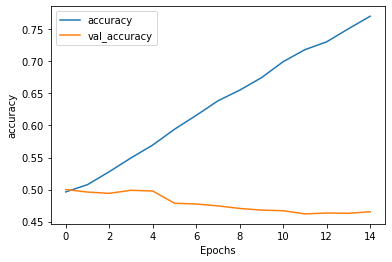

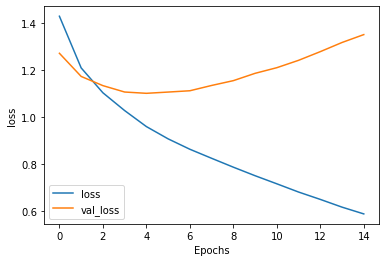

In [28]:
plot_graphs(history_3, "accuracy")
plot_graphs(history_3, "loss")

In [29]:
embedding_dim = 50

model4 = Sequential()
model4.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen))
model4.add(GlobalMaxPool1D())
model4.add(Dropout(0.2))
model4.add(Dense(16, activation='relu'))
model4.add(Dropout(0.2))
model4.add(Dense(7, activation='softmax'))

model4.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

model4.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 100, 50)           1406400   
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 50)                0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 16)                816       
_________________________________________________________________
dropout_4 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 7)                 119       
Total params: 1,407,335
Trainable params: 1,407,335
Non-trainable params: 0
____________________________________________

In [30]:
history_4 = model4.fit(X_train, y_train,
                       batch_size=32,
                       epochs=15,
                       validation_data=(X_test, y_test))

Train on 15141 samples, validate on 5047 samples
Epoch 1/15
15141/15141 [==============================] - 12s 788us/step - loss: 1.4565 - accuracy: 0.4840 - val_loss: 1.2743 - val_accuracy: 0.5039
Epoch 2/15
15141/15141 [==============================] - 11s 759us/step - loss: 1.2304 - accuracy: 0.4984 - val_loss: 1.1417 - val_accuracy: 0.4951
Epoch 3/15
15141/15141 [==============================] - 12s 765us/step - loss: 1.1189 - accuracy: 0.5114 - val_loss: 1.0910 - val_accuracy: 0.4991
Epoch 4/15
15141/15141 [==============================] - 11s 756us/step - loss: 1.0611 - accuracy: 0.5226 - val_loss: 1.0699 - val_accuracy: 0.4951
Epoch 5/15
15141/15141 [==============================] - 11s 753us/step - loss: 1.0254 - accuracy: 0.5292 - val_loss: 1.0596 - val_accuracy: 0.4904
Epoch 6/15
15141/15141 [==============================] - 11s 750us/step - loss: 0.9979 - accuracy: 0.5315 - val_loss: 1.0558 - val_accuracy: 0.4858
Epoch 7/15
15141/15141 [==============================] -

In [31]:
loss, accuracy = model4.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model4.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.6531
Testing Accuracy:  0.4807


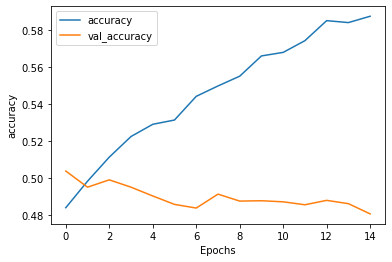

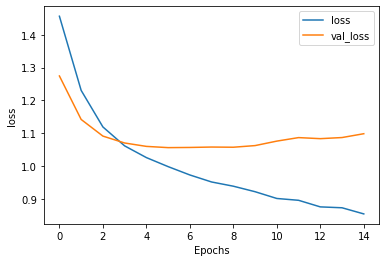

In [32]:
plot_graphs(history_4, "accuracy")
plot_graphs(history_4, "loss")

In [33]:
embedding_dim = 50

model5 = Sequential()
model5.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen))
model5.add(Conv1D(128, 5, activation='relu'))
model5.add(GlobalMaxPool1D())
model5.add(Dense(10, activation='relu'))
model5.add(Dense(7, activation='softmax'))

model5.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

model5.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 100, 50)           1406400   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 96, 128)           32128     
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 128)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1290      
_________________________________________________________________
dense_14 (Dense)             (None, 7)                 77        
Total params: 1,439,895
Trainable params: 1,439,895
Non-trainable params: 0
_________________________________________________________________


In [34]:
history_5 = model5.fit(X_train, y_train,
                       batch_size=10,
                       epochs=5,
                       validation_data=(X_test, y_test))

Train on 15141 samples, validate on 5047 samples
Epoch 1/5
15141/15141 [==============================] - 42s 3ms/step - loss: 1.2269 - accuracy: 0.4956 - val_loss: 1.0874 - val_accuracy: 0.4829
Epoch 2/5
15141/15141 [==============================] - 42s 3ms/step - loss: 1.0112 - accuracy: 0.5121 - val_loss: 1.0625 - val_accuracy: 0.4888
Epoch 3/5
15141/15141 [==============================] - 41s 3ms/step - loss: 0.9337 - accuracy: 0.5512 - val_loss: 1.0985 - val_accuracy: 0.4951
Epoch 4/5
15141/15141 [==============================] - 41s 3ms/step - loss: 0.8585 - accuracy: 0.5996 - val_loss: 1.1298 - val_accuracy: 0.4666
Epoch 5/5
15141/15141 [==============================] - 41s 3ms/step - loss: 0.7644 - accuracy: 0.6599 - val_loss: 1.1998 - val_accuracy: 0.4672


In [35]:
loss, accuracy = model5.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model5.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.7589
Testing Accuracy:  0.4672


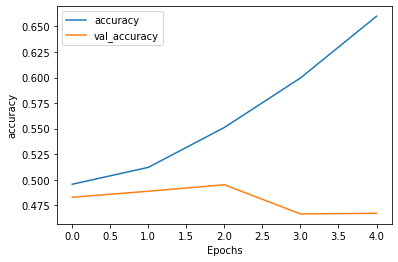

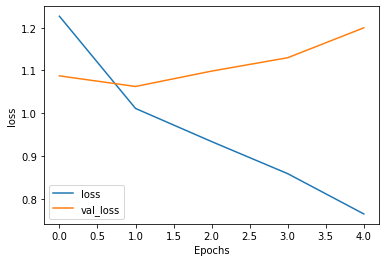

In [36]:
plot_graphs(history_5, "accuracy")
plot_graphs(history_5, "loss")

In [37]:
df['category'].value_counts()

None                        10123
Home & Kitchen               4960
Tools & Home Improvement     2080
Office Products              1144
Grocery & Gourmet Food       1102
Industrial & Scientific       588
Electronics                   191
Name: category, dtype: int64

In [38]:
a = df['category'].unique()
print(a)

['None' 'Home & Kitchen' 'Tools & Home Improvement' 'Office Products'
 'Grocery & Gourmet Food' 'Electronics' 'Industrial & Scientific']


In [43]:
#above_35 = titanic[titanic["Age"] > 35]
df1=df[df["category"]=="None"][:191]
df2=df[df["category"]=='Home & Kitchen' ][:191]
df3=df[df["category"]=='Tools & Home Improvement' ][:191]
df4=df[df["category"]=="Office Products"][:191]
df5=df[df["category"]=='Grocery & Gourmet Food' ][:191]
df6=df[df["category"]=='Electronics' ][:191]
df7=df[df["category"]=='Industrial & Scientific' ][:191]
df7.shape

(191, 2)

In [44]:
frames = [df1, df2,df3,df4,df5,df6,df7]
  
result = pd.concat(frames)

In [52]:
result.shape

(1337, 2)

In [53]:
df= result
sentences = df['title']
y = df['category']

sentences_train, sentences_test, train_y, test_y = train_test_split(sentences, y, test_size=0.25, random_state=42)

In [55]:
tokenize = Tokenizer(num_words=1000)
tokenize.fit_on_texts(sentences_train)

X_train = tokenize.texts_to_sequences(sentences_train)
X_test = tokenize.texts_to_sequences(sentences_test)

vocab_size = len(tokenize.word_index) + 1  

print(sentences_train[3])
print(X_train[3])

Baseboarders&reg; Wall Brackets
[21, 8, 18, 494, 495]


In [56]:
maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

print(X_train[3, :])

[ 21   8  18 494 495   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]


In [57]:
encoder = LabelEncoder()
encoder.fit(train_y)
y_train = encoder.transform(train_y)
y_test = encoder.transform(test_y)

num_classes = np.max(y_train) + 1
print(num_classes)
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

7


In [58]:
embedding_dim = 50

model3 = Sequential()
model3.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen))
model3.add(GlobalMaxPool1D())
model3.add(Dense(16, activation='relu'))
model3.add(Dense(7, activation='softmax'))

model3.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

model3.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 100, 50)           261500    
_________________________________________________________________
global_max_pooling1d_5 (Glob (None, 50)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 16)                816       
_________________________________________________________________
dense_18 (Dense)             (None, 7)                 119       
Total params: 262,435
Trainable params: 262,435
Non-trainable params: 0
_________________________________________________________________


In [62]:
history_3 = model3.fit(X_train, y_train,
                       batch_size=32,
                       epochs=100,
                       validation_data=(X_test, y_test))

Train on 1002 samples, validate on 335 samples
Epoch 1/100
1002/1002 [==============================] - 0s 363us/step - loss: 0.3438 - accuracy: 0.9551 - val_loss: 1.5314 - val_accuracy: 0.4627
Epoch 2/100
1002/1002 [==============================] - 0s 353us/step - loss: 0.2879 - accuracy: 0.9641 - val_loss: 1.5630 - val_accuracy: 0.4627
Epoch 3/100
1002/1002 [==============================] - 0s 356us/step - loss: 0.2405 - accuracy: 0.9731 - val_loss: 1.5936 - val_accuracy: 0.4507
Epoch 4/100
1002/1002 [==============================] - 0s 345us/step - loss: 0.2021 - accuracy: 0.9800 - val_loss: 1.6232 - val_accuracy: 0.4687
Epoch 5/100
1002/1002 [==============================] - 0s 352us/step - loss: 0.1712 - accuracy: 0.9840 - val_loss: 1.6544 - val_accuracy: 0.4687
Epoch 6/100
1002/1002 [==============================] - 0s 355us/step - loss: 0.1464 - accuracy: 0.9880 - val_loss: 1.6780 - val_accuracy: 0.4687
Epoch 7/100
1002/1002 [==============================] - 0s 358us/step 

1002/1002 [==============================] - 0s 345us/step - loss: 0.0122 - accuracy: 0.9960 - val_loss: 2.5012 - val_accuracy: 0.4597
Epoch 57/100
1002/1002 [==============================] - 0s 356us/step - loss: 0.0124 - accuracy: 0.9960 - val_loss: 2.5118 - val_accuracy: 0.4657
Epoch 58/100
1002/1002 [==============================] - 0s 358us/step - loss: 0.0121 - accuracy: 0.9950 - val_loss: 2.5198 - val_accuracy: 0.4627
Epoch 59/100
1002/1002 [==============================] - 0s 339us/step - loss: 0.0121 - accuracy: 0.9960 - val_loss: 2.5288 - val_accuracy: 0.4657
Epoch 60/100
1002/1002 [==============================] - 0s 329us/step - loss: 0.0121 - accuracy: 0.9960 - val_loss: 2.5357 - val_accuracy: 0.4657
Epoch 61/100
1002/1002 [==============================] - 0s 342us/step - loss: 0.0119 - accuracy: 0.9950 - val_loss: 2.5482 - val_accuracy: 0.4657
Epoch 62/100
1002/1002 [==============================] - 0s 339us/step - loss: 0.0119 - accuracy: 0.9960 - val_loss: 2.5557 

In [63]:
loss, accuracy = model3.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model3.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9960
Testing Accuracy:  0.4716


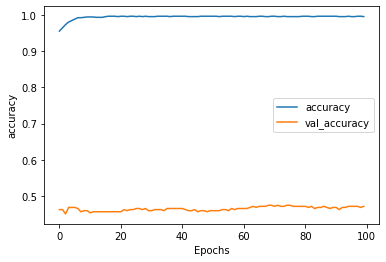

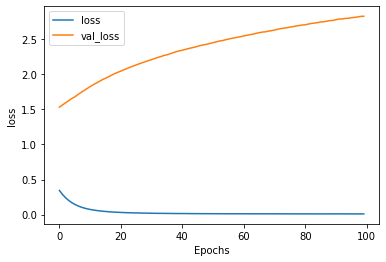

In [64]:
plot_graphs(history_3, "accuracy")
plot_graphs(history_3, "loss")